#### Unsupervised machine learning using the K-means clustering algorithm.

In [65]:
# import necessasry libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

##### Exploratory data analysis

In [66]:
# import the dataset
df = pd.read_csv("Mall_Customers.csv")

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [67]:
df.shape

(200, 5)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


###### We have 0 null values.
##### Variables description:
###### CustomerID: Unique customer identifier.
###### Gender: Customer gender.
###### Age: Customer age.
###### Annual Income (k$): Customer's annual income in k$.
###### CSpending Score (1-100): A score assigned to each customer that reflects their level of spending.

##### Summary descriptive statistics of the numerical variables

In [69]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


##### Taking a closer look at the categorical variable 'Gender'

In [70]:
# Count the different values (category names)
df.Genre.value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

##### Checking for outliers

In [71]:
# Rename the features to convenient ones
df.rename(columns={'Genre':'Gender', 'Annual Income (k$)':'Annual_Income', 'Spending Score (1-100)':'Spending_Score'}, inplace=True) 

# Remove CustomerID as it's not relevant for our study.
# Create a backup copy of the dataframe before removing the CustomerID.
df_backup = df.copy()
df.drop(columns = 'CustomerID', inplace = True)


df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [72]:
# The function receives a dataframe and a column name and returns the quartiles.
def get_iqr_values(df_in, col_name):
    median_value = df_in[col_name].median() # The median.
    q1 = df_in[col_name].quantile(0.25) # The 1st quartile.
    q3 = df_in[col_name].quantile(0.75) # The 3rd quartile.
    iqr = q3-q1 # The interquartile range.
    min_value  = q1-1.5*iqr # The minimum (marker |- in the boxplot).
    max_value = q3+1.5*iqr # The maximum (marked -| in the boxplot).
    return median_value, q1, q3, iqr, min_value, max_value

# The function receives a dataframe and the name of the column and returns the text formatted with the data from the get_iqr_values function.
def get_iqr_text(df_in, col_name):
    median_value, q1, q3, iqr, min_value, max_value = get_iqr_values(df_in, col_name)
    text = f"median={median_value:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, min={min_value:.2f}, max={max_value:.2f}"
    return text

# The function receives a dataframe and the column name and returns the dataframe without the outliers.
def remove_outliers(df_in, col_name):
    _, _, _, _, min_value, max_value = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > min_value) & (df_in[col_name] < max_value)]
    return df_out

# The function receives a dataframe and the name of the column and returns the number of outliers in the column.
def count_outliers(df_in, col_name):
    _, _, _, _, min_value, max_value = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= min_value) | (df_in[col_name] >= max_value)]
    return df_outliers.shape[0]

# The function receives the name of a dataframe and the name of a column and plots a boxplot.
def boxplot(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()
    
# The function receives a dataframe and iterates through each of the numeric columns to remove all outliers or up to a maximum of 
# 100 iterations, returns the dataframe without the outliers, and displays the number of outliers removed.
def remove_all_outliers(df_in):
    columns=df.select_dtypes(include=['float64','int64']).columns
    totalOutliers=0
    for col_name in columns:
        iterations = 0
        outlier_count = count_outliers(df_in, col_name)
        
        while outlier_count > 0:
            iterations += 1

            if (iterations > 100):
                print("Number of outliers > 100. Breaking out of the loop")
                break  
            
            totalOutliers += count_outliers(df_in, col_name)
            df_in = remove_outliers(df_in, col_name)
            outlier_count = count_outliers(df_in, col_name)  
            
    print(totalOutliers, "Outliers removed",)
    return df_in



Age has 0 outliers


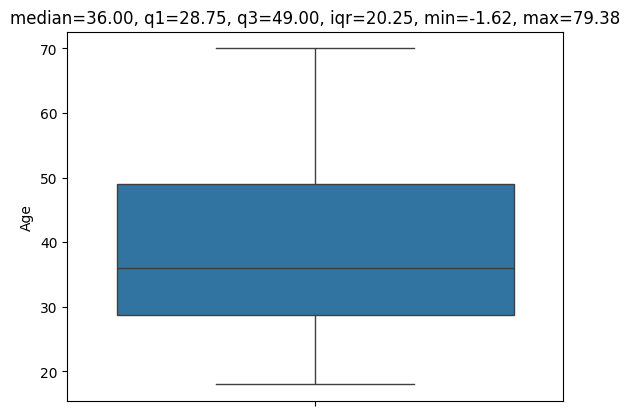

Annual_Income has 2 outliers


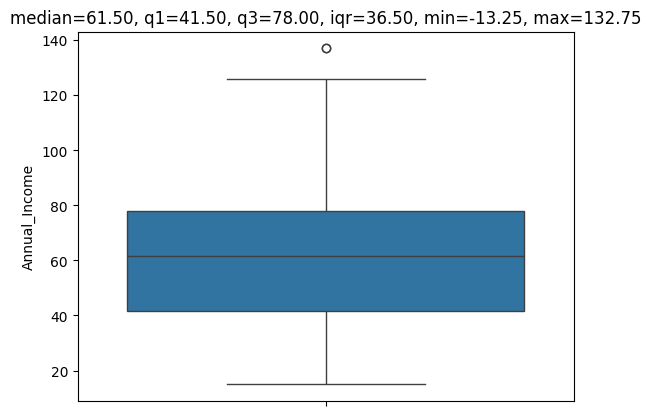

Spending_Score has 0 outliers


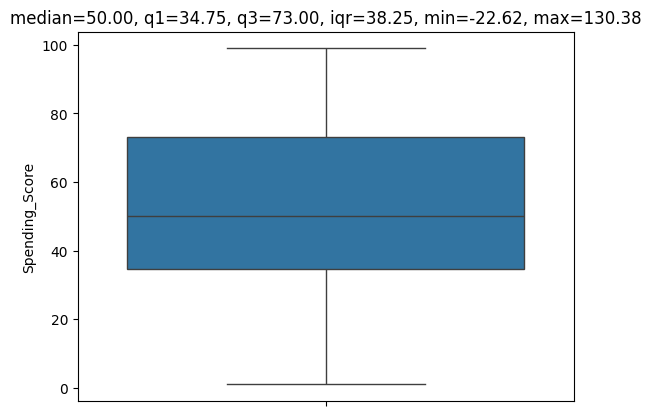

In [73]:
# Iterate through the numeric columns of the dataset to plot the outliers and describe the distribution of the variables.
for column in (df.select_dtypes(include=['float64','int64']).columns):
    print(f"{column} has {count_outliers(df, column)} outliers")
    boxplot(df, column)


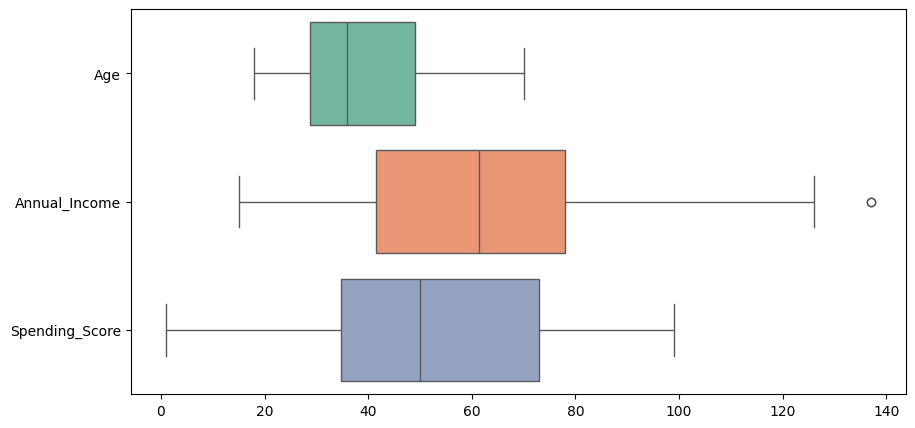

In [74]:
# Putting all the boxplots together
plt.figure(figsize = (10,5))
sns.boxplot(data = df, orient="h", palette="Set2")

plt.show();

In [75]:
df = remove_all_outliers(df)

2 Outliers removed
